# 📈 02 - Cohort Analysis

**Week 2 Deliverable**: Cohort Analysis with Retention Curves

## Objectives
1. Create monthly cohorts based on first purchase date
2. Calculate retention rates for each cohort
3. Visualize retention patterns with heatmaps
4. Analyze revenue by cohort

---

## 1. Setup & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

print('Libraries loaded!')

Libraries loaded!


In [2]:
# Load cleaned data
df = pd.read_csv('../data/processed/online_retail_clean.csv', parse_dates=['InvoiceDate'])
print(f'Loaded {len(df):,} records')
df.head()

Loaded 392,692 records


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Wednesday,8


## 2. Create Cohorts

In [3]:
# Get first purchase date for each customer (Cohort)
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# First purchase month = Cohort
cohort_df = df.groupby('CustomerID')['InvoiceMonth'].min().reset_index()
cohort_df.columns = ['CustomerID', 'CohortMonth']

# Merge back
df = df.merge(cohort_df, on='CustomerID')

print(f'Cohorts created: {df["CohortMonth"].nunique()} cohorts')
df[['CustomerID', 'InvoiceMonth', 'CohortMonth']].head(10)

Cohorts created: 13 cohorts


,CustomerID,InvoiceMonth,CohortMonth
0,17850,2010-12,2010-12
1,17850,2010-12,2010-12
2,17850,2010-12,2010-12
3,17850,2010-12,2010-12
4,17850,2010-12,2010-12
5,17850,2010-12,2010-12
6,17850,2010-12,2010-12
7,17850,2010-12,2010-12
8,17850,2010-12,2010-12
9,13047,2010-12,2010-12


In [4]:
# Calculate cohort index (months since first purchase)
def get_cohort_index(row):
    return (row['InvoiceMonth'].year - row['CohortMonth'].year) * 12 + \
           (row['InvoiceMonth'].month - row['CohortMonth'].month)

df['CohortIndex'] = df.apply(get_cohort_index, axis=1)

print(f'Cohort index range: {df["CohortIndex"].min()} to {df["CohortIndex"].max()}')

Cohort index range: 0 to 12


## 3. Customer Retention Analysis

In [5]:
# Create cohort pivot table (unique customers)
cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()
cohort_data.columns = ['CohortMonth', 'CohortIndex', 'Customers']

# Pivot to matrix form
cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Customers')

print('Cohort Customer Count Matrix:')
cohort_pivot

Cohort Customer Count Matrix:


CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Calculate retention rates
cohort_size = cohort_pivot.iloc[:, 0]  # First month = cohort size
retention = cohort_pivot.divide(cohort_size, axis=0)

print('Retention Rate Matrix:')
retention.round(3)

Retention Rate Matrix:


CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.366,0.323,0.384,0.363,0.398,0.363,0.349,0.354,0.395,0.374,0.503,0.266
2011-01,1.0,0.221,0.266,0.230,0.321,0.288,0.247,0.242,0.300,0.326,0.365,0.118,NaN
2011-02,1.0,0.187,0.187,0.284,0.271,0.247,0.253,0.279,0.247,0.305,0.068,NaN,NaN
2011-03,1.0,0.150,0.252,0.199,0.223,0.168,0.268,0.230,0.279,0.086,NaN,NaN,NaN
2011-04,1.0,0.213,0.203,0.210,0.197,0.227,0.217,0.260,0.073,NaN,NaN,NaN,NaN
2011-05,1.0,0.190,0.173,0.173,0.208,0.232,0.264,0.095,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.174,0.157,0.264,0.231,0.335,0.095,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.181,0.207,0.223,0.271,0.112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207,0.249,0.243,0.124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


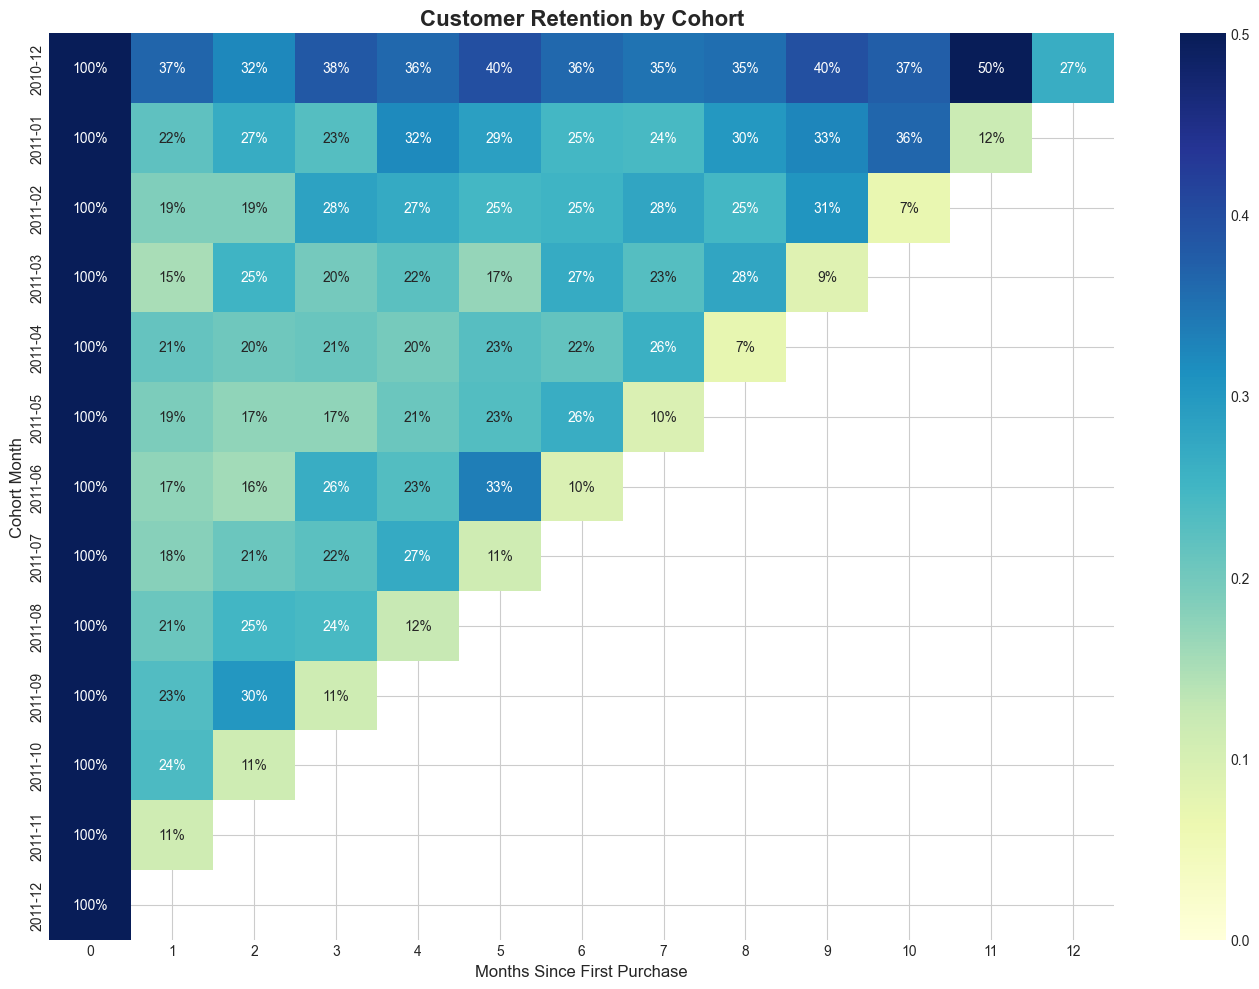

In [7]:
# Retention Heatmap
plt.figure(figsize=(14, 10))

sns.heatmap(retention, 
            annot=True, 
            fmt='.0%', 
            cmap='YlGnBu',
            vmin=0,
            vmax=0.5)

plt.title('Customer Retention by Cohort', fontsize=16, fontweight='bold')
plt.xlabel('Months Since First Purchase', fontsize=12)
plt.ylabel('Cohort Month', fontsize=12)
plt.tight_layout()
plt.savefig('../data/processed/cohort_retention_heatmap.png', dpi=300)
plt.show()

## 4. Retention Curves

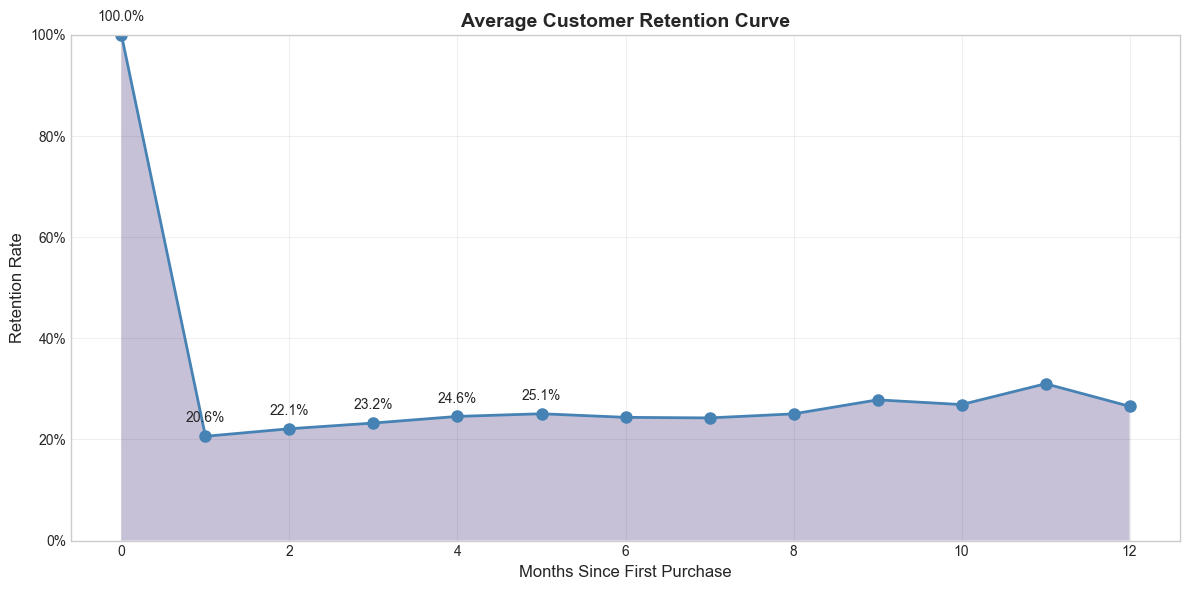

In [8]:
# Average retention curve
avg_retention = retention.mean(axis=0)

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(avg_retention.index, avg_retention.values, marker='o', linewidth=2, markersize=8, color='steelblue')
ax.fill_between(avg_retention.index, avg_retention.values, alpha=0.3)

ax.set_title('Average Customer Retention Curve', fontsize=14, fontweight='bold')
ax.set_xlabel('Months Since First Purchase', fontsize=12)
ax.set_ylabel('Retention Rate', fontsize=12)
ax.set_ylim(0, 1)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax.grid(True, alpha=0.3)

# Add annotations
for i, v in enumerate(avg_retention.values[:6]):
    ax.annotate(f'{v:.1%}', (i, v), textcoords='offset points', xytext=(0, 10), ha='center')

plt.tight_layout()
plt.savefig('../data/processed/retention_curve.png', dpi=300)
plt.show()

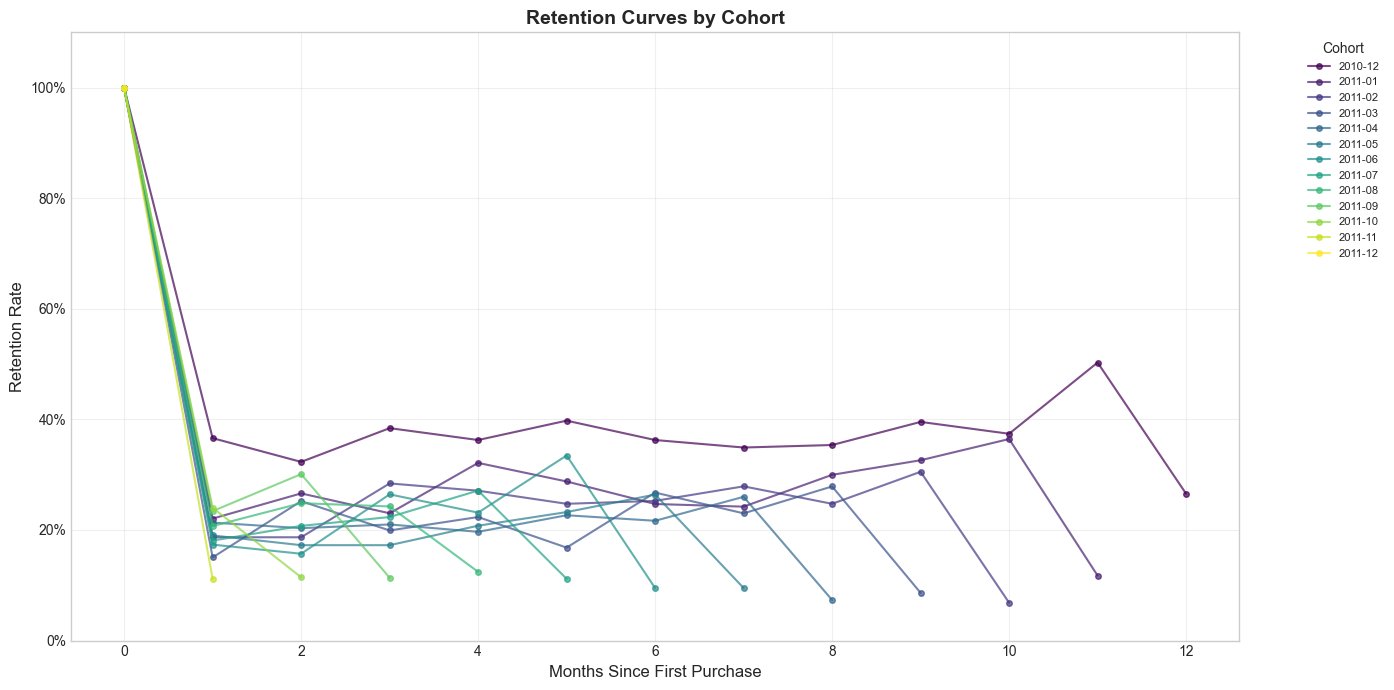

In [9]:
# Individual cohort retention curves
fig, ax = plt.subplots(figsize=(14, 7))

# Plot each cohort
colors = plt.cm.viridis(np.linspace(0, 1, len(retention)))

for idx, (cohort, data) in enumerate(retention.iterrows()):
    ax.plot(data.index, data.values, marker='o', markersize=4, 
            color=colors[idx], alpha=0.7, label=str(cohort))

ax.set_title('Retention Curves by Cohort', fontsize=14, fontweight='bold')
ax.set_xlabel('Months Since First Purchase', fontsize=12)
ax.set_ylabel('Retention Rate', fontsize=12)
ax.set_ylim(0, 1.1)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax.legend(title='Cohort', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../data/processed/cohort_retention_curves.png', dpi=300)
plt.show()

## 5. Cohort Revenue Analysis

In [10]:
# Revenue by cohort and period
cohort_revenue = df.groupby(['CohortMonth', 'CohortIndex'])['Revenue'].sum().reset_index()
cohort_revenue_pivot = cohort_revenue.pivot(index='CohortMonth', columns='CohortIndex', values='Revenue')

print('Cohort Revenue Matrix (£):')
cohort_revenue_pivot.round(0)

Cohort Revenue Matrix (£):


CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,570423.0,275734.0,233390.0,302367.0,204034.0,336114.0,313668.0,310304.0,331001.0,471792.0,455479.0,512341.0,185361.0
2011-01,292367.0,54994.0,63157.0,71526.0,80990.0,84465.0,70073.0,72503.0,71870.0,111371.0,123253.0,26388.0,NaN
2011-02,157701.0,28938.0,40964.0,48155.0,40089.0,34156.0,49674.0,62293.0,55241.0,64689.0,10600.0,NaN,NaN
2011-03,199620.0,30040.0,58958.0,42739.0,51392.0,39962.0,64824.0,70524.0,70848.0,12761.0,NaN,NaN,NaN
2011-04,121809.0,29399.0,25029.0,24283.0,26253.0,30103.0,28506.0,34010.0,6332.0,NaN,NaN,NaN,NaN
2011-05,123739.0,18642.0,20156.0,19162.0,27753.0,32875.0,33168.0,179184.0,NaN,NaN,NaN,NaN,NaN
2011-06,135415.0,14738.0,14104.0,30899.0,26670.0,42531.0,8143.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,73860.0,11790.0,15488.0,17392.0,19157.0,6041.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,79601.0,20934.0,35458.0,44488.0,15284.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


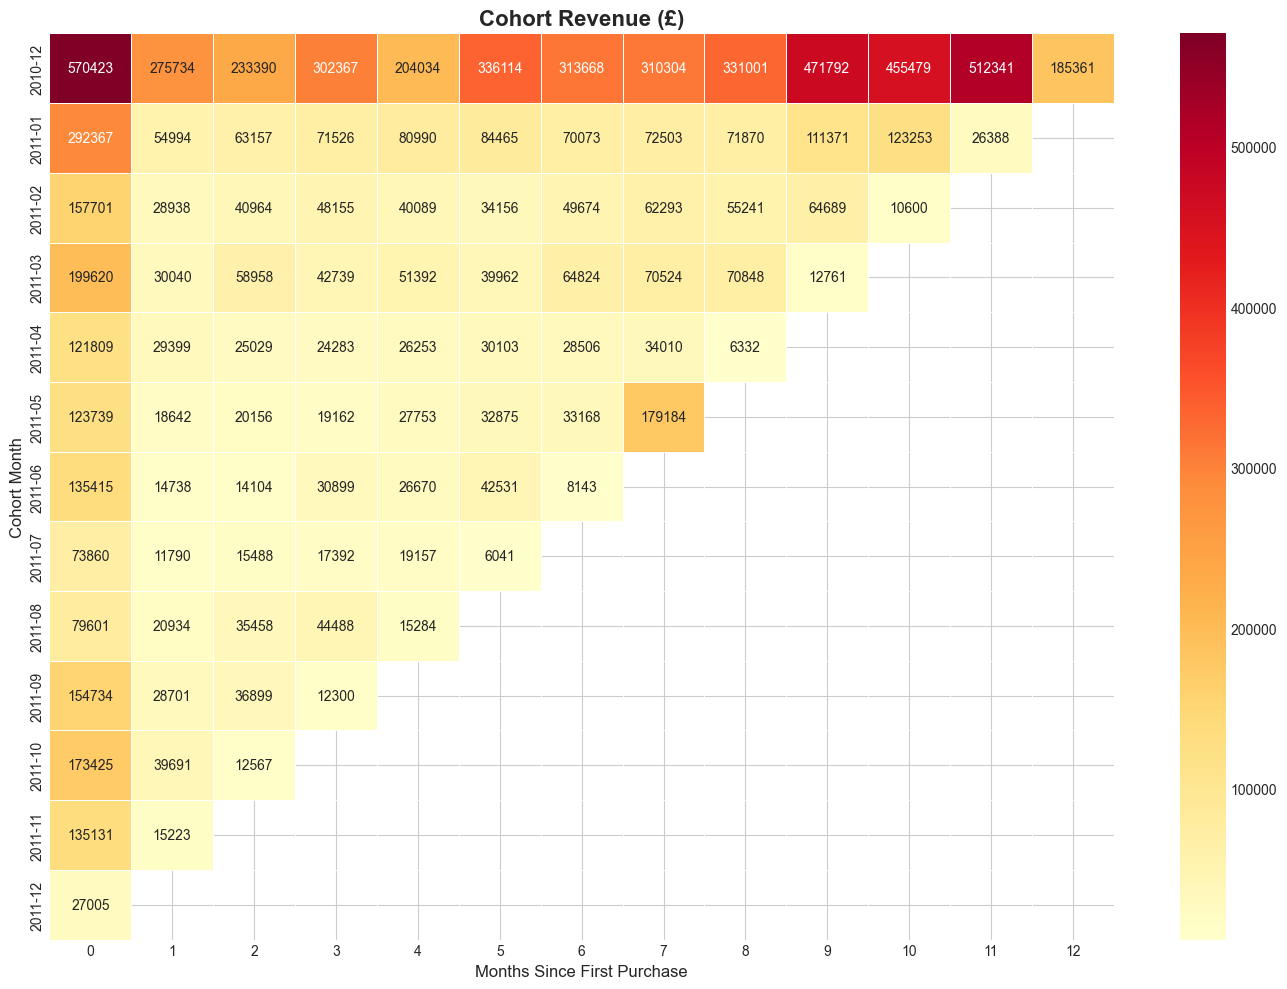

In [11]:
# Revenue heatmap
plt.figure(figsize=(14, 10))

sns.heatmap(cohort_revenue_pivot, 
            annot=True, 
            fmt='.0f', 
            cmap='YlOrRd',
            linewidths=0.5)

plt.title('Cohort Revenue (£)', fontsize=16, fontweight='bold')
plt.xlabel('Months Since First Purchase', fontsize=12)
plt.ylabel('Cohort Month', fontsize=12)
plt.tight_layout()
plt.savefig('../data/processed/cohort_revenue_heatmap.png', dpi=300)
plt.show()

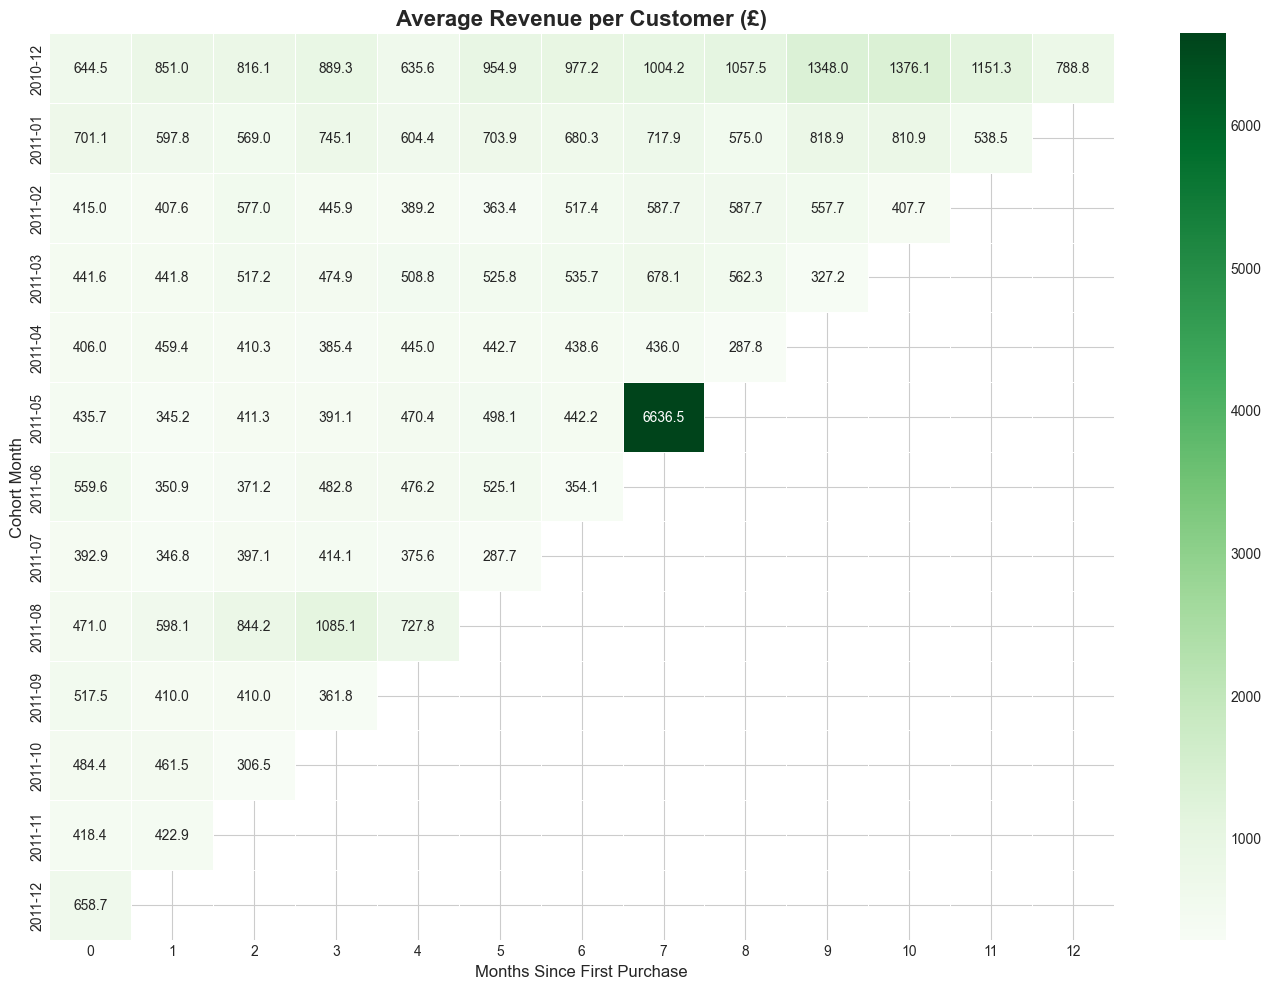

In [12]:
# Average revenue per customer by cohort period
avg_revenue_per_customer = cohort_revenue_pivot.divide(cohort_pivot)

plt.figure(figsize=(14, 10))

sns.heatmap(avg_revenue_per_customer, 
            annot=True, 
            fmt='.1f', 
            cmap='Greens',
            linewidths=0.5)

plt.title('Average Revenue per Customer (£)', fontsize=16, fontweight='bold')
plt.xlabel('Months Since First Purchase', fontsize=12)
plt.ylabel('Cohort Month', fontsize=12)
plt.tight_layout()
plt.savefig('../data/processed/cohort_avg_revenue.png', dpi=300)
plt.show()

## 6. Cohort Size Analysis

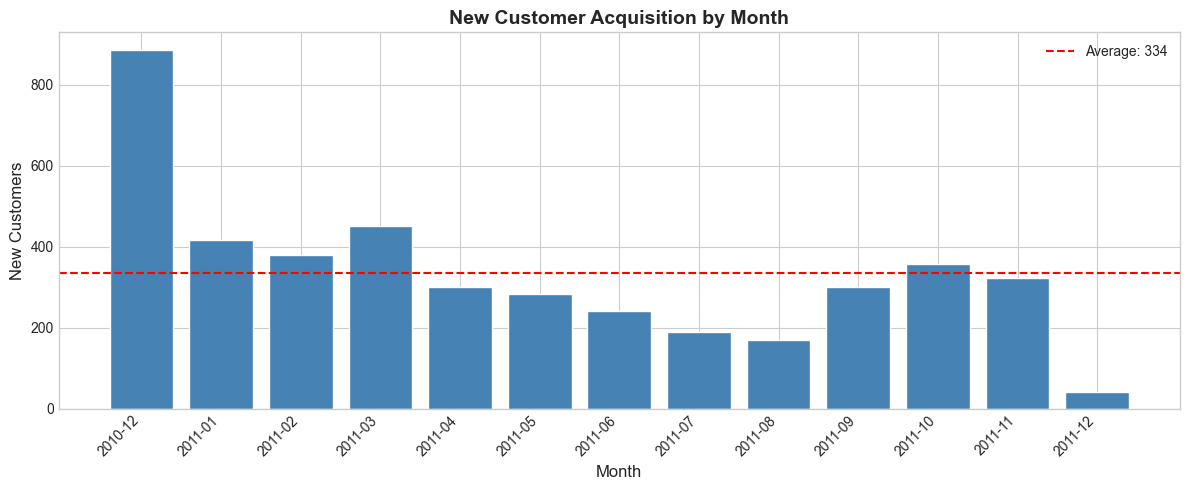

In [13]:
# Cohort sizes over time
cohort_sizes = cohort_pivot.iloc[:, 0].reset_index()
cohort_sizes.columns = ['CohortMonth', 'Customers']

fig, ax = plt.subplots(figsize=(12, 5))

ax.bar(range(len(cohort_sizes)), cohort_sizes['Customers'], color='steelblue', edgecolor='white')
ax.set_xticks(range(len(cohort_sizes)))
ax.set_xticklabels([str(x) for x in cohort_sizes['CohortMonth']], rotation=45, ha='right')

ax.set_title('New Customer Acquisition by Month', fontsize=14, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('New Customers', fontsize=12)

# Add average line
avg_size = cohort_sizes['Customers'].mean()
ax.axhline(y=avg_size, color='red', linestyle='--', label=f'Average: {avg_size:.0f}')
ax.legend()

plt.tight_layout()
plt.savefig('../data/processed/cohort_sizes.png', dpi=300)
plt.show()

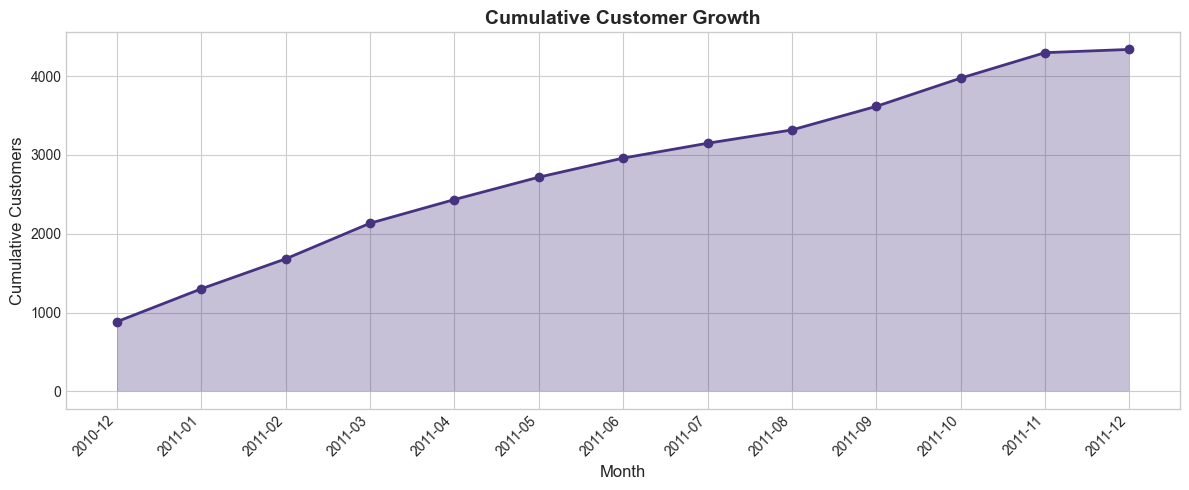

In [14]:
# Cumulative customer growth
cohort_sizes['CumulativeCustomers'] = cohort_sizes['Customers'].cumsum()

fig, ax = plt.subplots(figsize=(12, 5))

ax.fill_between(range(len(cohort_sizes)), cohort_sizes['CumulativeCustomers'], alpha=0.3)
ax.plot(range(len(cohort_sizes)), cohort_sizes['CumulativeCustomers'], marker='o', linewidth=2)

ax.set_xticks(range(len(cohort_sizes)))
ax.set_xticklabels([str(x) for x in cohort_sizes['CohortMonth']], rotation=45, ha='right')

ax.set_title('Cumulative Customer Growth', fontsize=14, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Cumulative Customers', fontsize=12)

plt.tight_layout()
plt.savefig('../data/processed/cumulative_growth.png', dpi=300)
plt.show()

## 7. Churn Analysis

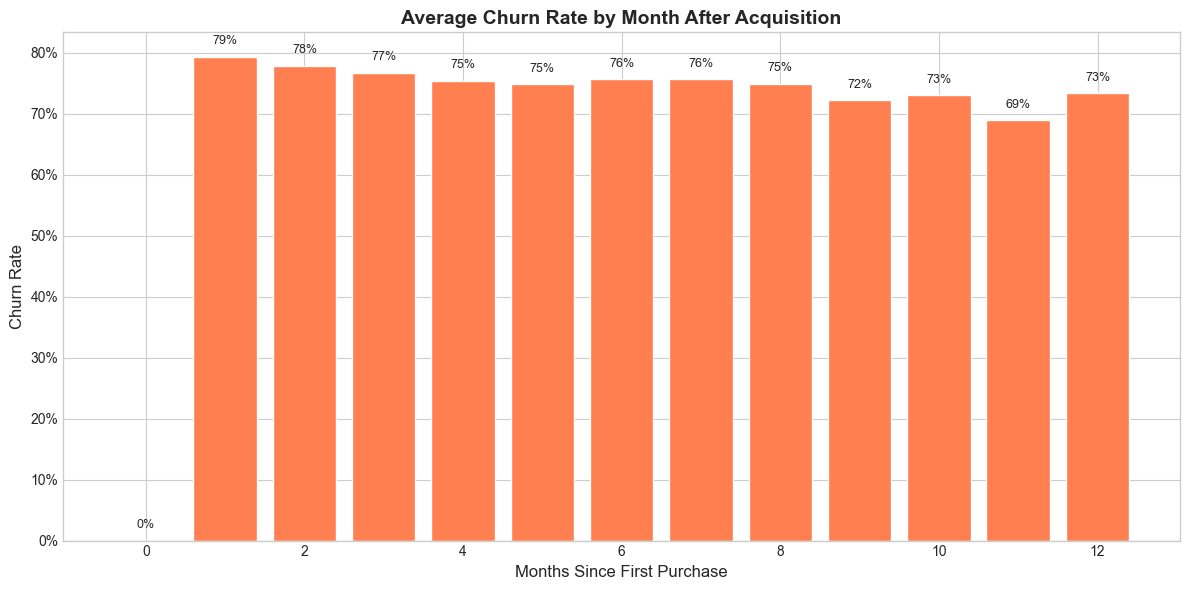

In [15]:
# Calculate churn rate (1 - retention)
churn = 1 - retention

# Average churn by period
avg_churn = churn.mean(axis=0)

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(avg_churn.index, avg_churn.values, color='coral', edgecolor='white')

ax.set_title('Average Churn Rate by Month After Acquisition', fontsize=14, fontweight='bold')
ax.set_xlabel('Months Since First Purchase', fontsize=12)
ax.set_ylabel('Churn Rate', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Add values
for i, v in enumerate(avg_churn.values):
    if not np.isnan(v):
        ax.text(i, v + 0.02, f'{v:.0%}', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('../data/processed/churn_rate.png', dpi=300)
plt.show()

## 8. Cohort Comparison

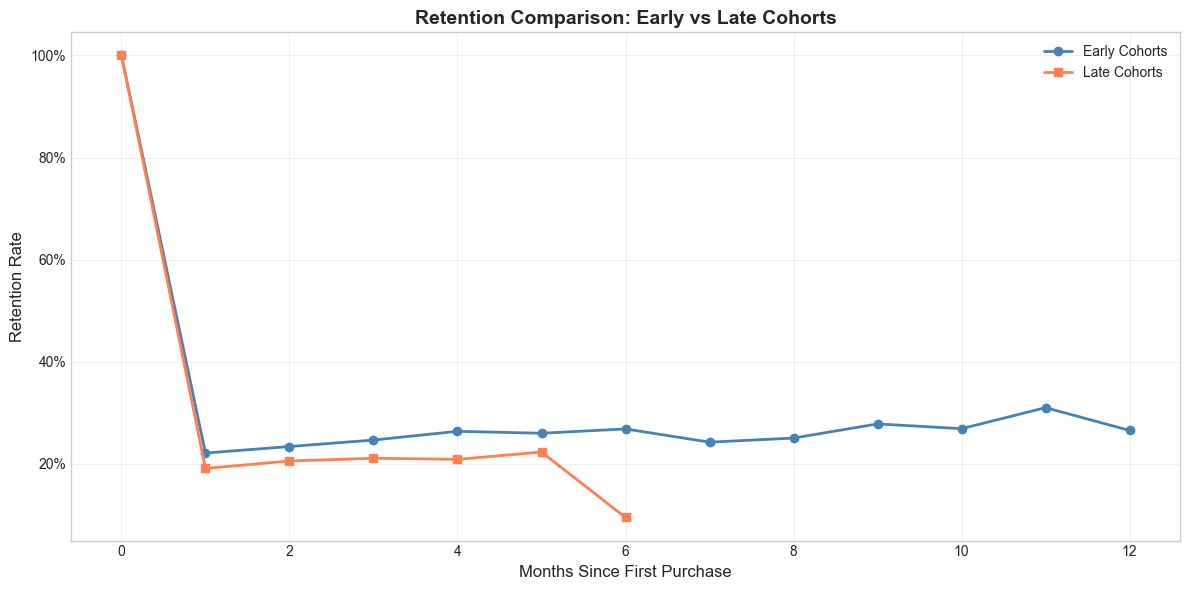

In [16]:
# Compare first half vs second half cohorts
n_cohorts = len(retention)
mid = n_cohorts // 2

early_cohorts = retention.iloc[:mid].mean(axis=0)
late_cohorts = retention.iloc[mid:].mean(axis=0)

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(early_cohorts.index, early_cohorts.values, marker='o', linewidth=2, label='Early Cohorts', color='steelblue')
ax.plot(late_cohorts.index, late_cohorts.values, marker='s', linewidth=2, label='Late Cohorts', color='coral')

ax.set_title('Retention Comparison: Early vs Late Cohorts', fontsize=14, fontweight='bold')
ax.set_xlabel('Months Since First Purchase', fontsize=12)
ax.set_ylabel('Retention Rate', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../data/processed/cohort_comparison.png', dpi=300)
plt.show()

## 9. Key Metrics Summary

In [17]:
print('=' * 60)
print('COHORT ANALYSIS - KEY INSIGHTS')
print('=' * 60)

print('\n Cohort Overview:')
print(f'   • Total cohorts: {len(cohort_pivot)}')
print(f'   • Average cohort size: {cohort_sizes["Customers"].mean():.0f} customers')
print(f'   • Largest cohort: {cohort_sizes["Customers"].max():.0f} customers')

print('\n Retention Metrics:')
print(f'   • Month 1 retention: {avg_retention.iloc[1]*100:.1f}%')
print(f'   • Month 3 retention: {avg_retention.iloc[3]*100:.1f}%' if len(avg_retention) > 3 else '   • Month 3: N/A')
print(f'   • Month 6 retention: {avg_retention.iloc[6]*100:.1f}%' if len(avg_retention) > 6 else '   • Month 6: N/A')

print('\n Revenue Insights:')
total_cohort_revenue = cohort_revenue_pivot.sum().sum()
print(f'   • Total cohort revenue: £{total_cohort_revenue:,.2f}')
print(f'   • Avg revenue per cohort: £{cohort_revenue_pivot.iloc[:, 0].mean():,.2f}')

print('\n Churn Analysis:')
print(f'   • Month 1 churn: {avg_churn.iloc[1]*100:.1f}%' if len(avg_churn) > 1 else '   • Month 1 churn: N/A')
print(f'   • Average monthly churn: {avg_churn.mean()*100:.1f}%')

print('\n' + '=' * 60)

COHORT ANALYSIS - KEY INSIGHTS

 Cohort Overview:
   • Total cohorts: 13
   • Average cohort size: 334 customers
   • Largest cohort: 885 customers

 Retention Metrics:
   • Month 1 retention: 20.6%
   • Month 3 retention: 23.2%
   • Month 6 retention: 24.4%

 Revenue Insights:
   • Total cohort revenue: £8,887,208.89
   • Avg revenue per cohort: £172,679.28

 Churn Analysis:
   • Month 1 churn: 79.4%
   • Average monthly churn: 69.1%



## 10. Save Cohort Data

In [18]:
# Save cohort data for further analysis
retention.to_csv('../data/processed/cohort_retention.csv')
cohort_revenue_pivot.to_csv('../data/processed/cohort_revenue.csv')
cohort_sizes.to_csv('../data/processed/cohort_sizes.csv', index=False)

print('Cohort data saved!')
print('  - cohort_retention.csv')
print('  - cohort_revenue.csv')
print('  - cohort_sizes.csv')

Cohort data saved!
  - cohort_retention.csv
  - cohort_revenue.csv
  - cohort_sizes.csv


## Next Steps

Continue to **Notebook 03 - RFM Segmentation** to:
- Calculate RFM scores for each customer
- Segment customers into meaningful groups
- Analyze segment characteristics